In [1]:
import sys
sys.path.append('C:\Users\micmitch\Documents\UBC\GIF\Programs\SimPEG')
import SimPEG as simpeg
import simpegDC as DC

import numpy as np
import scipy
import matplotlib.pyplot as plt
import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# hx = [(cs,7, -1.3),(cs,51),(cs,7, 1.3)]
# hy = [(cs,7, -1.3),(cs,63),(cs,7, 1.3)]
# hz = [(cs,7, -1.3),(cs,51),(cs,7, 1.3)]

# Minimum cell size in each direction
dx = 1.
dy = 1.
dz = 1.

# Number of core cells in each direction
nCoreX = 51.
nCoreY = 63.
nCoreZ = 51.

# Cell widths
hx = [(dx,nCoreX)]
hy = [(dy,nCoreY)]
hz = [(dz,nCoreZ)]

# Mesh origin (Bottom SW corner)
x0 = 0.
y0 = -12.
z0 = 0.

In [3]:
mesh = simpeg.Mesh.TensorMesh([hx, hy, hz],[x0,y0,z0])
print mesh

  ---- 3-D TensorMesh ----  
   x0: 0.00
   y0: -12.00
   z0: 0.00
  nCx: 51
  nCy: 63
  nCz: 51
   hx: 51*1.00
   hy: 63*1.00
   hz: 51*1.00


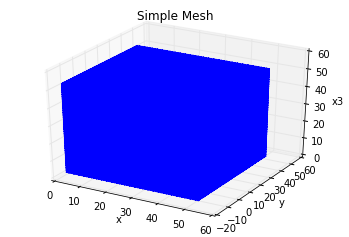

In [4]:
mesh.plotGrid()
plt.title('Simple Mesh')
plt.xlabel('x')
plt.ylabel('y')
# ax.set_zlabel('z')

In [5]:
# Define electrode locations
elecLoc = np.array([[5.5, 15.5, 25.5], 
    [ 5.5, 20.5, 25.5 ],
    [ 5.5, 25.5, 25.5 ],
    [ 5.5, 30.5, 25.5 ],
    [ 5.5, 35.5, 25.5 ],
    [ 5.5, 40.5, 25.5 ],
    [ 5.5, 45.5, 25.5 ],
    [ 10.5, 45.5, 25.5 ],
    [ 15.5, 45.5, 25.5 ],
    [ 20.5, 45.5, 25.5 ],
    [ 25.5, 45.5, 25.5 ],
    [ 30.5, 45.5, 25.5 ],
    [ 35.5, 45.5, 25.5 ],
    [ 40.5, 45.5, 25.5 ],
    [ 45.5, 45.5, 25.5 ],
    [ 45.5, 40.5, 25.5 ],
    [ 45.5, 35.5, 25.5 ],
    [ 45.5, 30.5, 25.5 ],
    [ 45.5, 25.5, 25.5 ],
    [ 45.5, 20.5, 25.5 ],
    [ 45.5, 15.5, 25.5 ],
    [ 45.5, 10.5, 25.5 ],
    [ 45.5,  5.5, 25.5 ],
    [ 45.5,  0.5, 25.5 ],
    [ 45.5, -4.5, 25.5 ],
    [ 45.5, -9.5, 25.5 ]])



In [27]:
# Create electrode sequence

# Combinations of electrodes for dipole-dipole measurements

nElec = elecLoc.shape[0]
# elecInd = np.linspace(0,nElec-1,nElec-1)
elecInd = np.arange(nElec)
elecSeqObj = itertools.combinations(elecInd,4) # n choose k combinations

# Extract data from combinations object
elecSeqList = []
for i in elecSeqObj:
    elecSeqList.append(tuple(i))
    
elecSeq = np.array(elecSeqList)
# elecSeq.shape

# Take permutations of each combination
FullElecSeqList = []
for row in elecSeq:
    permObj = itertools.permutations(row)
    for j in permObj:
        FullElecSeqList.append(tuple(j))
        
FullElecSeq = np.array(FullElecSeqList)
# FullElecSeq.shape
# check = FullElecSeq[0:30,:]
# print check


# Sort FullElecSeq by Tx columns
FullElecSeq_Tx = FullElecSeq[:,0:2].copy() #np.hstack([[FullElecSeq[:,0:1]], [FullElecSeq[:,1:2]]])

FullElecSeq_TxSort = np.array(np.sort(FullElecSeq_Tx, axis=1))


# Sort FullElecSeq by Rx columns
FullElecSeq_Rx = FullElecSeq[:,2:4].copy() 

FullElecSeq_RxSort = np.array(np.sort(FullElecSeq_Rx, axis=1))


# Combine sorted Tx and Rx arrays
FullElecSeq_Combined = np.hstack([FullElecSeq_TxSort,FullElecSeq_RxSort])
# check = FullElecSeq_Combined[0:30,:]
# print check
FullElecSeq_Combined.shape


# Find unique rows
def unique_rows(A, return_index=False, return_inverse=False):
    """
    Similar to MATLAB's unique(A, 'rows'), this returns B, I, J
    where B is the unique rows of A and I and J satisfy
    A = B[J,:] and B = A[I,:]

    Returns I if return_index is True
    Returns J if return_inverse is True
    
    From bfroehle (https://github.com/numpy/numpy/issues/2871) 
    """
    A = np.require(A, requirements='C')
    assert A.ndim == 2, "array must be 2-dim'l"

    B = np.unique(A.view([('', A.dtype)]*A.shape[1]),
               return_index=return_index,
               return_inverse=return_inverse)

    if return_index or return_inverse:
        return (B[0].view(A.dtype).reshape((-1, A.shape[1]), order='C'),) \
            + B[1:]
    else:
        return B.view(A.dtype).reshape((-1, A.shape[1]), order='C')
    
FullElecSeq_Unique  = unique_rows(FullElecSeq_Combined)
# print FullElecSeq_Unique.shape
# print FullElecSeq_Unique[1:20,:]
# print FullElecSeq_Unique[-20::,:]


In [26]:
TxKey = unique_rows(FullElecSeq_Unique[:,0:2]);
# print TxKey

nTx = TxKey.shape[0]
# print nTx

simpeg.Survey.



In [ ]:
# Create synthetic model
sigmaFull = 1e-4
sigma = np.ones(mesh.nC)*sigmaFull

# Add tunnels
sigmaTunnel = 1e-8

t1_1 = np.array([2,49,24])
t1_2 = np.array([5,15,27])
tunnel1 = simpeg.Utils.ModelBuilder.getIndicesBlock(t1_1,t1_2, mesh.gridCC)
sigma[tunnel1] = sigmaTunnel

t2_1 = [2,49,24];
t2_2 = [49,46,27];
tunnel2 = simpeg.Utils.ModelBuilder.getIndicesBlock(t2_1,t2_2, mesh.gridCC)
sigma[tunnel2] = sigmaTunnel

t3_1 = [46,49,24];
t3_2 = [49,-10,27];
tunnel3 = simpeg.Utils.ModelBuilder.getIndicesBlock(t3_1,t3_2, mesh.gridCC)
sigma[tunnel3] = sigmaTunnel

# Add conductive block
sigmaBlk1 = 10;
b1_1 = [20,30,16];
b1_2 = [30,20,35];
blk1 = simpeg.Utils.ModelBuilder.getIndicesBlock(b1_1,b1_2, mesh.gridCC)
sigma[blk1] = sigmaBlk1



In [ ]:
mesh.plotSlice(sigma, normal='X', ind=25, grid=True)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

mesh.plotSlice(sigma, normal='Y', ind=34, grid=True)
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

mesh.plotSlice(sigma, normal='Z', ind=25, grid=True)
plt.gca().set_aspect('equal', adjustable='box')
# plt.colormaps()
# plt.colorbar()
plt.draw()


# How would I plot these using a log colorscale and insert a colorbar?